# Figure 4

written by Greta Shum,  
modified by Abby Swann  

using NCAR NPL 2023b environment

In [1]:
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import pandas as pd


### Load data from file created in Paper_figs2_3_JGR

In [2]:
data_table=pd.read_csv('JGRfigures/merged_table.csv')

data_table=data_table.set_index(data_table.columns[0])

In [3]:
data_table

,Broadband solar,Visible/near-IR,CO2 (ppm),Global average planetary albedo,Global mean surface temperature (C),"Radiative forcing (W m-2) relative to 10ppm, albedo 0.4",Percent of land area with Tmax>-2C in warmest month,Percent of land area with PE>P in annual mean,Percent of land area with PE>P and Tmax>-2C,Percent of ocean area with PE>P and Tmax>-2C
Unnamed: 0,,,,,,,,,,
moderncam4b_010p10p30a,0.20,0.1/0.3,10,0.661098,-64.355001,4.063010,7.049737,78.103020,7.049737,0.602885
moderncam4b_010p20p40a,0.30,0.2/0.4,10,0.673570,-66.694334,2.051821,0.805372,72.738840,0.805372,0.028511
moderncam4b_010p30p50a,0.40,0.3/0.5,10,0.685482,-68.958172,0.000000,0.000000,65.061764,0.000000,0.000000
moderncam4b_025p20p40a,0.30,0.2/0.4,25,0.672353,-65.975562,3.598809,1.105201,73.800041,1.105201,0.095909
moderncam4b_050p10p30a,0.20,0.1/0.3,50,0.658629,-62.896782,6.814683,9.791642,79.275912,9.791642,0.831141
moderncam4b_050p15p35a,0.25,0.15/0.35,50,0.665133,-64.142472,5.814007,4.388318,77.515159,4.388318,0.380191
moderncam4b_050p20p40a,0.30,0.2/0.4,50,0.671304,-65.341035,4.803493,1.652371,74.692777,1.652371,0.148306
moderncam4b_050p25p45a,0.35,0.25/0.45,50,0.677422,-66.535753,3.782826,0.404022,72.161468,0.404022,0.028511
moderncam4b_050p30p50a,0.40,0.3/0.5,50,0.683359,-67.693389,2.751672,0.000000,67.572821,0.000000,0.000000


In [4]:
hex_colors = sns.color_palette("bwr", 10, as_cmap=False).as_hex()

run_color = {'moderncam4b_010p10p30a': hex_colors[9],
             'moderncam4b_010p20p40a': hex_colors[7],
             'moderncam4b_010p30p50a': 'k',
             'moderncam4b_025p20p40a': sns.color_palette("viridis",10).as_hex()[9],
             
             'moderncam4b_050p10p30a': sns.color_palette("plasma",10).as_hex()[1],
             'moderncam4b_050p15p35a': sns.color_palette("plasma",10).as_hex()[3],
             'moderncam4b_050p20p40a': sns.color_palette("plasma", 10).as_hex()[5],
             'moderncam4b_050p25p45a': sns.color_palette("plasma", 10).as_hex()[7],
             'moderncam4b_050p30p50a': hex_colors[2],

             'moderncam4b_100p20p40a': sns.color_palette("viridis", 10).as_hex()[5],
             'moderncam4b_100p30p50a': hex_colors[1],

             'moderncam4b_200p10p30a': 'saddlebrown',
             'moderncam4b_200p20p40a': sns.color_palette("viridis", 10).as_hex()[2],
             'moderncam4b_200p30p50a': hex_colors[0],
            }

In [5]:
toggle_color = 1
edgecolors = None

In [6]:
# select the runs to display on graphs
co2_runs =  ['moderncam4b_010p30p50a',
             'moderncam4b_050p30p50a',
             'moderncam4b_200p30p50a']
alb_runs =  ['moderncam4b_010p30p50a',
             'moderncam4b_010p20p40a',
             'moderncam4b_010p10p30a']


co2 = np.array([10, 50, 200])
alb = np.array([0.4, 0.3, 0.2])



# a
# runs used in this plot
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']

# b
# runs used in this plot
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']


# c
# runs used in this plot
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']]


# d
# runs used in this plot
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']


# e
# runs used in this plot
# ['moderncam4b_010p10p30a'], run_color['moderncam4b_050p10p30a'], run_color['moderncam4b_200p10p30a']
# ['moderncam4b_200p30p50a'], run_color['moderncam4b_200p20p40a'], run_color['moderncam4b_200p10p30a']


In [7]:
# how to retrieve data from the table
row = data_table.loc[['moderncam4b_200p30p50a']]

# single item in row

item=data_table.loc[['moderncam4b_200p30p50a'],['Percent of land area with Tmax>-2C in warmest month']]

row

,Broadband solar,Visible/near-IR,CO2 (ppm),Global average planetary albedo,Global mean surface temperature (C),"Radiative forcing (W m-2) relative to 10ppm, albedo 0.4",Percent of land area with Tmax>-2C in warmest month,Percent of land area with PE>P in annual mean,Percent of land area with PE>P and Tmax>-2C,Percent of ocean area with PE>P and Tmax>-2C
Unnamed: 0,,,,,,,,,,
moderncam4b_200p30p50a,0.4,0.3/0.5,200,0.681716,-66.37385,5.162031,0.098807,71.072053,0.098807,0.0


In [8]:
# load radiative forcing data, used in all sub panels of fig 4 except d

# retrieve data from pandas data frame and put into array
co2_rf=np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_rf[r] = data_table.loc[[co2_runs[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values

# retrieve data from pandas data frame and put into array
alb_rf=np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_rf[r] = data_table.loc[[alb_runs[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values


In [9]:
co2_rf

array([0.        , 2.75167242, 5.16203077])

# combined figure 4

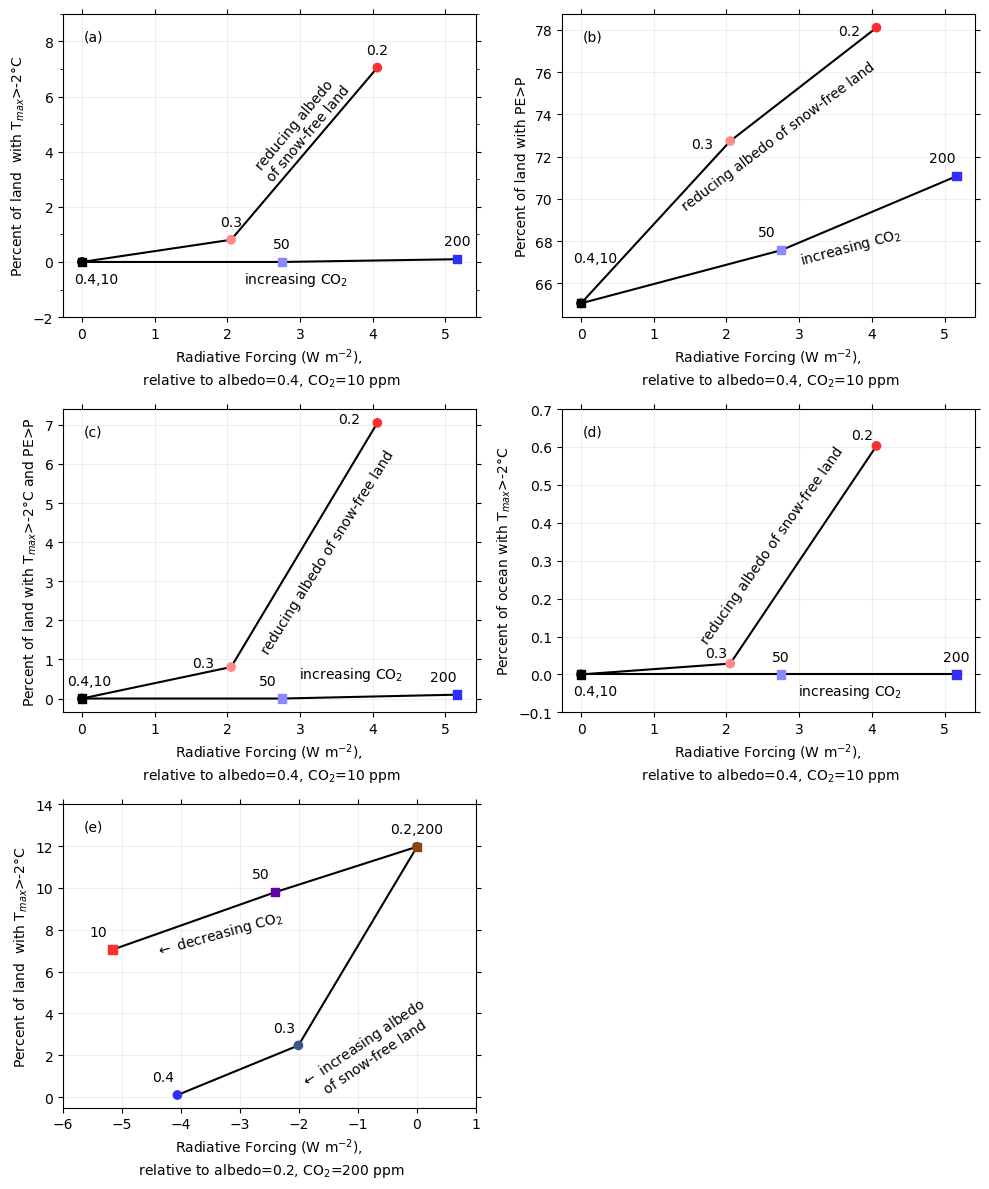

In [26]:
panel_data_names=['Percent of land area with Tmax>-2C in warmest month',
                  'Percent of land area with PE>P in annual mean',
                  'Percent of land area with PE>P and Tmax>-2C',
                  'Percent of ocean area with PE>P and Tmax>-2C',
                  'Percent of land area with Tmax>-2C in warmest month'] # note last one has baseline removed

panel_labels=['(a)','(b)','(c)','(d)','(e)']

nr=3
nc=2
fig, axs = plt.subplots(nr,nc,figsize=(5*nc, 4*nr))
axes=axs.flatten()



# load radiative forcing data, used in all sub panels of fig 4 except d

# retrieve data from pandas data frame and put into array
co2_rf=np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_rf[r] = data_table.loc[[co2_runs[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values

# retrieve data from pandas data frame and put into array
alb_rf=np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_rf[r] = data_table.loc[[alb_runs[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values

######################################################################
#----- Panel a ------#

p=0
ax=axes[p]

# retrieve data from pandas data frame and put into array
co2_data = np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_data[r] = data_table.loc[[co2_runs[r]],['Percent of land area with Tmax>-2C in warmest month']].values

# retrieve data from pandas data frame and put into array
alb_data = np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_data[r] = data_table.loc[[alb_runs[r]],['Percent of land area with Tmax>-2C in warmest month']].values


da_co2 = xr.DataArray(co2_data,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(alb_data,
    coords=[alb_rf],
    dims="rad_forcing",
)

da_co2.plot(marker = None if toggle_color == 1 else 's', c = 'k',ax=ax)
da_alb.plot(marker = None if toggle_color == 1 else 'o', c = 'k',ax=ax)
if toggle_color == 1:
    da_co2.plot.scatter( marker = 's', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']] if toggle_color == 1 else 'k', 
                        zorder = 5,
                        edgecolors = edgecolors,#marker_edgewidth=1,
                       ax=ax)
    da_alb.plot.scatter( marker = 'o', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5,
                        edgecolors = edgecolors,
                       ax=ax)
else:
    pass


# Add subplot annotation inside the axes
ax.text(0.05, 0.95, '(a)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
ax.annotate(f"{alb[0]},{co2[0]}", (co2_rf[0], co2_data[0]), textcoords="offset points", xytext=(10,-15), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_data)):
    ax.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(0,10), ha='center') if i != 0 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_data)):
    ax.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(0,10), ha='center') if i != 0 else None

# Annotate "increasing CO2"
ax.annotate("increasing CO$_2$", (co2_rf[1], co2_data[1]), textcoords="offset points", xytext=(10,-15), ha='center', rotation=0)

# Annotate "decreasing albedo"
ax.annotate("reducing albedo\n of snow-free land", (alb_rf[1], alb_data[1]), textcoords="offset points", xytext=(50,40), ha='center', rotation=50)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

ax.set_yticks(np.arange(-2,10,1),minor=True)
ax.set_xticks(np.arange(0,6,1), minor=True)

ax.set_ylabel('Percent of land  with T$_{max}$>-2°C')
ax.set_xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.4, CO$_2$=10 ppm')

# ax.tight_layout()

ax.grid(True,alpha=0.2, zorder=0)


######################################################################
#----- Panel b ------#

p=1
ax=axes[p]


# Figure 4b Radiative Forcing vs. Percent of Land with PE > P


# retrieve data from pandas data frame and put into array
co2_pctPEmP = np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_pctPEmP[r] = data_table.loc[[co2_runs[r]],['Percent of land area with PE>P in annual mean']].values

# retrieve data from pandas data frame and put into array
alb_pctPEmP = np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_pctPEmP[r] = data_table.loc[[alb_runs[r]],['Percent of land area with PE>P in annual mean']].values



da_co2 = xr.DataArray(
    co2_pctPEmP,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(
    alb_pctPEmP,
    coords=[alb_rf],
    dims="rad_forcing",
)

da_co2.plot(marker = None if toggle_color == 1 else 's', #'s',
            c = 'k', markerfacecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',ax=ax)
da_alb.plot(marker = None if toggle_color == 1 else 'o', #'o',
            c = 'k', markerfacecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',ax=ax)
if toggle_color == 1:
    da_co2.plot.scatter(marker = 's', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,ax=ax)
    da_alb.plot.scatter(marker = 'o', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,ax=ax)
else:
    pass

# Add subplot annotation inside the axes
# ax.text(0.05, 0.95, '(c)', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.95, '(b)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
ax.annotate(f"{alb[0]},{co2[0]}", (co2_rf[0], co2_pctPEmP[0]), textcoords="offset points", xytext=(10,30), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_pctPEmP)):
    ax.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(-10,10), ha='center') if i != 0 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_pctPEmP)):
    ax.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(-20,-5), ha='center') if i != 0 else None

# Annotate "increasing CO2"
ax.annotate("increasing CO$_2$", (co2_rf[1], co2_pctPEmP[1]), textcoords="offset points", xytext=(50,-10), ha='center', rotation=15)

# Annotate "decreasing albedo"
ax.annotate("reducing albedo of snow-free land", (alb_rf[1], alb_pctPEmP[1]), textcoords="offset points", xytext=(35,-50), ha='center', rotation=37)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

# ax.set_ylim([24,38])
# plt.yticks(np.arange(-.2,1,0.2),minor=True)
ax.set_xticks(np.arange(0,6,1), minor=True)

ax.set_ylabel('Percent of land with PE>P')
ax.set_xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.4, CO$_2$=10 ppm')

ax.grid(True,alpha=0.2, zorder=0)


######################################################################
#----- Panel c ------#

p=2
ax=axes[p]


# Figure 4c Radiative Forcing vs. Percent of Land with Tmax > -2°C and PE > P


# retrieve data from pandas data frame and put into array
co2_pctB = np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_pctB[r] = data_table.loc[[co2_runs[r]],['Percent of land area with PE>P and Tmax>-2C']].values

# retrieve data from pandas data frame and put into array
alb_pctB = np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_pctB[r] = data_table.loc[[alb_runs[r]],['Percent of land area with PE>P and Tmax>-2C']].values



da_co2 = xr.DataArray(
    co2_pctB,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(
    alb_pctB,
    coords=[alb_rf],
    dims="rad_forcing",
)

da_co2.plot(marker = None if toggle_color == 1 else 's', #'s',
            c = 'k', markerfacecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k', ax=ax)
da_alb.plot(marker = None if toggle_color == 1 else 'o', #'o',
            c = 'k', markerfacecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k', ax=ax)
if toggle_color == 1:
    da_co2.plot.scatter(marker = 's', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors, ax=ax)
    da_alb.plot.scatter(marker = 'o', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors, ax=ax)
else:
    pass

# Add subplot annotation inside the axes
# ax.text(0.05, 0.95, '(d)', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.95, '(c)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
ax.annotate(f"{alb[0]},{co2[0]}", (co2_rf[0], co2_pctB[0]), textcoords="offset points", xytext=(5,10), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_pctB)):
    ax.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(-10,10), ha='center') if i != 0 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_pctB)):
    ax.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(-20,0), ha='center') if i != 0 else None

# Annotate "increasing CO2"
ax.annotate("increasing CO$_2$", (co2_rf[1], co2_pctB[1]), textcoords="offset points", xytext=(50,15), ha='center', rotation=0)

# Annotate "decreasing albedo"
ax.annotate("reducing albedo of snow-free land", (alb_rf[1], alb_pctB[1]), textcoords="offset points", xytext=(70,10), ha='center', rotation=58)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

# plt.ylim([-2,14])
# plt.yticks(np.arange(-.2,1,0.2),minor=True)
ax.set_xticks(np.arange(0,6,1), minor=True)

ax.set_ylabel('Percent of land with T$_{max}$>-2°C and PE>P')
ax.set_xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.4, CO$_2$=10 ppm')


ax.grid(True,alpha=0.2, zorder=0)


######################################################################
#----- Panel d ------#

p=3
ax=axes[p]

# Figure 4d Radiative Forcing vs. Percent of Ocean with Tmax > -2°C 

# retrieve data from pandas data frame and put into array
co2_pctT = np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_pctT[r] = data_table.loc[[co2_runs[r]],['Percent of ocean area with PE>P and Tmax>-2C']].values

# retrieve data from pandas data frame and put into array
alb_pctT = np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_pctT[r] = data_table.loc[[alb_runs[r]],['Percent of ocean area with PE>P and Tmax>-2C']].values



da_co2 = xr.DataArray(
    co2_pctT,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(
    alb_pctT,
    coords=[alb_rf],
    dims="rad_forcing",
)

da_co2.plot(marker = None if toggle_color == 1 else 's', #'s',
            c = 'k', markerfacecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',ax=ax)
da_alb.plot(marker = None if toggle_color == 1 else 'o', #'o',
            c = 'k', markerfacecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',ax=ax)
if toggle_color == 1:
    da_co2.plot.scatter(marker = 's', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,ax=ax)
    da_alb.plot.scatter(marker = 'o', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,ax=ax)
else:
    pass

# Add subplot annotation inside the axes
# ax.text(0.05, 0.95, '(e)', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.95, '(d)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
ax.annotate(f"{alb[0]},{co2[0]}", (co2_rf[0], co2_pctT[0]), textcoords="offset points", xytext=(10,-15), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_pctT)):
    ax.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(0,10), ha='center') if i != 0 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_pctT)):
    ax.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(-10,5), ha='center') if i != 0 else None

# Annotate "increasing CO2"
ax.annotate("increasing CO$_2$", (co2_rf[1], co2_pctT[1]), textcoords="offset points", xytext=(50,-15), ha='center', rotation=0)

# Annotate "decreasing albedo"
ax.annotate("reducing albedo of snow-free land", (alb_rf[1], alb_pctT[1]), textcoords="offset points", xytext=(30,15), ha='center', rotation=55)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

ax.set_ylim([-.1,.7])
# plt.yticks(np.arange(-.2,1,0.2),minor=True)
ax.set_xticks(np.arange(0,6,1), minor=True)

ax.set_ylabel('Percent of ocean with T$_{max}$>-2°C')
ax.set_xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.4, CO$_2$=10 ppm')

ax.grid(True,alpha=0.2, zorder=0)



######################################################################
#----- Panel e ------#

p=4
ax=axes[p]


# Figure 4e Radiative Forcing vs. Percent of Land with Tmax>-2°C


co2_runs_d=['moderncam4b_010p10p30a','moderncam4b_050p10p30a','moderncam4b_200p10p30a']
alb_runs_d=['moderncam4b_200p30p50a','moderncam4b_200p20p40a','moderncam4b_200p10p30a']

# baseline run is : moderncam4b_200p10p30a
baselinerun='moderncam4b_200p10p30a'
baseline_data = data_table.loc[[baselinerun],['Percent of land area with Tmax>-2C in warmest month']].values
baseline_rf = data_table.loc[[baselinerun],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values


# retrieve data from pandas data frame and put into array
co2_rf_d=np.empty([len(co2_runs_d)])
for r in range(len(co2_runs_d)):
    co2_rf[r] = data_table.loc[[co2_runs_d[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values-baseline_rf

# retrieve data from pandas data frame and put into array
alb_rf_d=np.empty([len(alb_runs_d)])
for r in range(len(co2_runs_d)):
    alb_rf[r] = data_table.loc[[alb_runs_d[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values-baseline_rf


# data: Percent of Land with Tmax>-2°C, this time with baseline at 0.2, 200 ppm, and we're going negative radiative forcing

# retrieve data from pandas data frame and put into array
co2_data = np.empty([len(co2_runs_d)])
for r in range(len(co2_runs_d)):
    co2_data[r] = data_table.loc[[co2_runs_d[r]],['Percent of land area with Tmax>-2C in warmest month']].values #- baseline_data

# retrieve data from pandas data frame and put into array
alb_data = np.empty([len(alb_runs_d)])
for r in range(len(co2_runs_d)):
    alb_data[r] = data_table.loc[[alb_runs_d[r]],['Percent of land area with Tmax>-2C in warmest month']].values #- baseline_data


da_co2 = xr.DataArray(co2_data,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(alb_data,
    coords=[alb_rf],
    dims="rad_forcing",
)

da_co2.plot(marker = None if toggle_color == 1 else 's', #'s',
            c = 'k', markerfacecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',ax=ax)
da_alb.plot(marker = None if toggle_color == 1 else 'o', #'o',
            c = 'k', markerfacecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',ax=ax)
if toggle_color == 1:
    da_co2.plot.scatter(marker = 's', 
                        color = [run_color['moderncam4b_010p10p30a'], run_color['moderncam4b_050p10p30a'], run_color['moderncam4b_200p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,ax=ax)
    da_alb.plot.scatter(marker = 'o', 
                        color = [run_color['moderncam4b_200p30p50a'], run_color['moderncam4b_200p20p40a'], run_color['moderncam4b_200p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,ax=ax)
else:
    pass

# Add subplot annotation inside the axes
ax.text(0.05, 0.95, '(e)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
ax.annotate(f"{alb[2]},{co2[2]}", (co2_rf[2], co2_data[2]), textcoords="offset points", xytext=(0,10), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_data)):
    ax.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(-10,10), ha='center') if i != 2 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_data)):
    ax.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(-10,10), ha='center') if i != 2 else None

# Annotate "increasing CO2"
ax.annotate(r"$\leftarrow$ decreasing CO$_2$", (co2_rf[1], co2_data[1]), textcoords="offset points", xytext=(-40,-45), ha='center', rotation=15.5)

# Annotate "decreasing albedo"
ax.annotate("$\leftarrow$ increasing albedo\n of snow-free land", (alb_rf[1], alb_data[1]), textcoords="offset points", xytext=(50,-40), ha='center', rotation=34)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

ax.set_ylim([-.5,14])
ax.set_xlim([-6,1])

# ax.set_yticks(np.arange(0,20,1),minor=True)
# ax.set_xticks(np.arange(-6,0,1), minor=True)

ax.set_ylabel('Percent of land  with T$_{max}$>-2°C')
ax.set_xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.2, CO$_2$=200 ppm')

ax.grid(True,alpha=0.2, zorder=0)

######################################################################
#----- Panel f BLANK ------#

p=5
ax=axes[p]
ax.set_visible(False)



######################################################################


fig.tight_layout()

fig.savefig('JGRfigures/Fig4_combined.png', dpi=300,facecolor=None,edgecolor=None,bbox_inches='tight',transparent=True,pad_inches=0.01)

plt.show();plt.close()


## Each sub panel as single fig

In [22]:
# load radiative forcing data, used in all sub panels of fig 4 except d

# retrieve data from pandas data frame and put into array
co2_rf=np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_rf[r] = data_table.loc[[co2_runs[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values

# retrieve data from pandas data frame and put into array
alb_rf=np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_rf[r] = data_table.loc[[alb_runs[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values


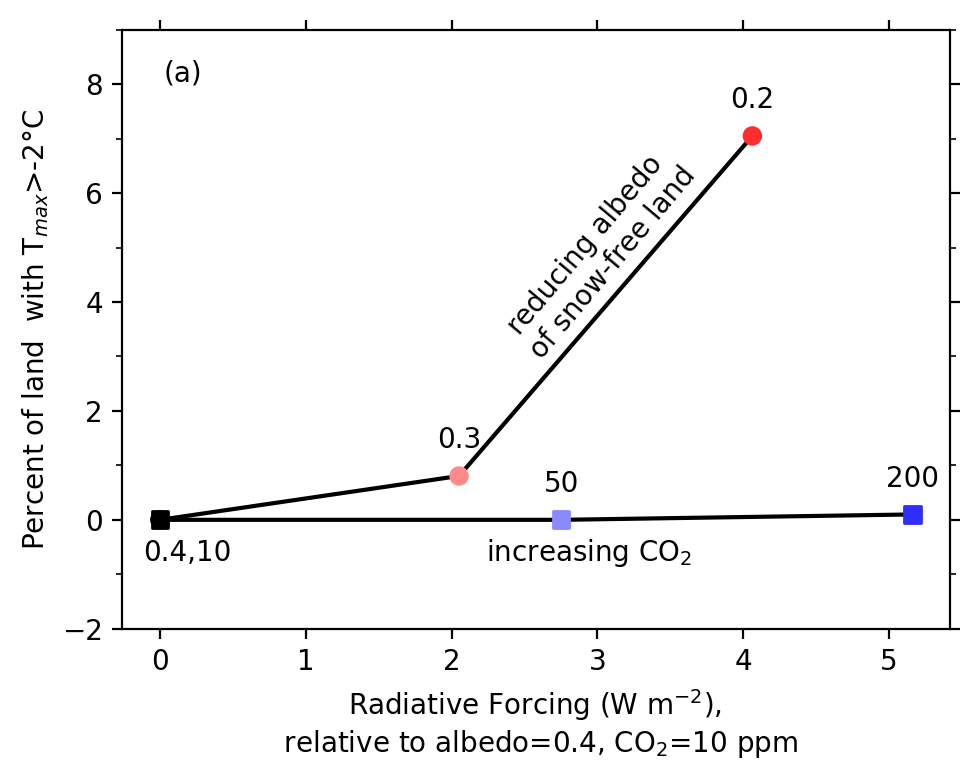

In [12]:
# Figure 4a Radiative Forcing vs. Percent of Land with Tmax>-2°C

if toggle_color == 1:
    filepath = 'JGRfigures/Fig4a_color'
else:
    filepath = 'JGRfigures/Fig4a'


# runs used in this plot
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']

# retrieve data from pandas data frame and put into array
co2_data = np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_data[r] = data_table.loc[[co2_runs[r]],['Percent of land area with Tmax>-2C in warmest month']].values

# retrieve data from pandas data frame and put into array
alb_data = np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_data[r] = data_table.loc[[alb_runs[r]],['Percent of land area with Tmax>-2C in warmest month']].values


da_co2 = xr.DataArray(co2_data,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(alb_data,
    coords=[alb_rf],
    dims="rad_forcing",
)

fig, ax = plt.subplots(dpi = 200,figsize = (5,4))
da_co2.plot(marker = None if toggle_color == 1 else 's', c = 'k')
da_alb.plot(marker = None if toggle_color == 1 else 'o', c = 'k')
if toggle_color == 1:
    da_co2.plot.scatter( marker = 's', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']] if toggle_color == 1 else 'k', 
                        zorder = 5,
                        edgecolors = edgecolors,#marker_edgewidth=1,
                       )
    da_alb.plot.scatter( marker = 'o', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5,
                        edgecolors = edgecolors,
                       )
else:
    pass


# Add subplot annotation inside the axes
ax.text(0.05, 0.95, '(a)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
plt.annotate(f"{alb[0]},{co2[0]}", (co2_rf[0], co2_data[0]), textcoords="offset points", xytext=(10,-15), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_data)):
    plt.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(0,10), ha='center') if i != 0 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_data)):
    plt.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(0,10), ha='center') if i != 0 else None

# Annotate "increasing CO2"
plt.annotate("increasing CO$_2$", (co2_rf[1], co2_data[1]), textcoords="offset points", xytext=(10,-15), ha='center', rotation=0)

# Annotate "decreasing albedo"
plt.annotate("reducing albedo\n of snow-free land", (alb_rf[1], alb_data[1]), textcoords="offset points", xytext=(50,40), ha='center', rotation=50)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

plt.yticks(np.arange(-2,10,1),minor=True)
plt.xticks(np.arange(0,6,1), minor=True)

plt.ylabel('Percent of land  with T$_{max}$>-2°C')
plt.xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.4, CO$_2$=10 ppm')

plt.tight_layout()
fig.savefig(filepath+'.png', dpi=300,facecolor=None,edgecolor=None,bbox_inches='tight',transparent=True,pad_inches=0.01)

plt.show();plt.close()

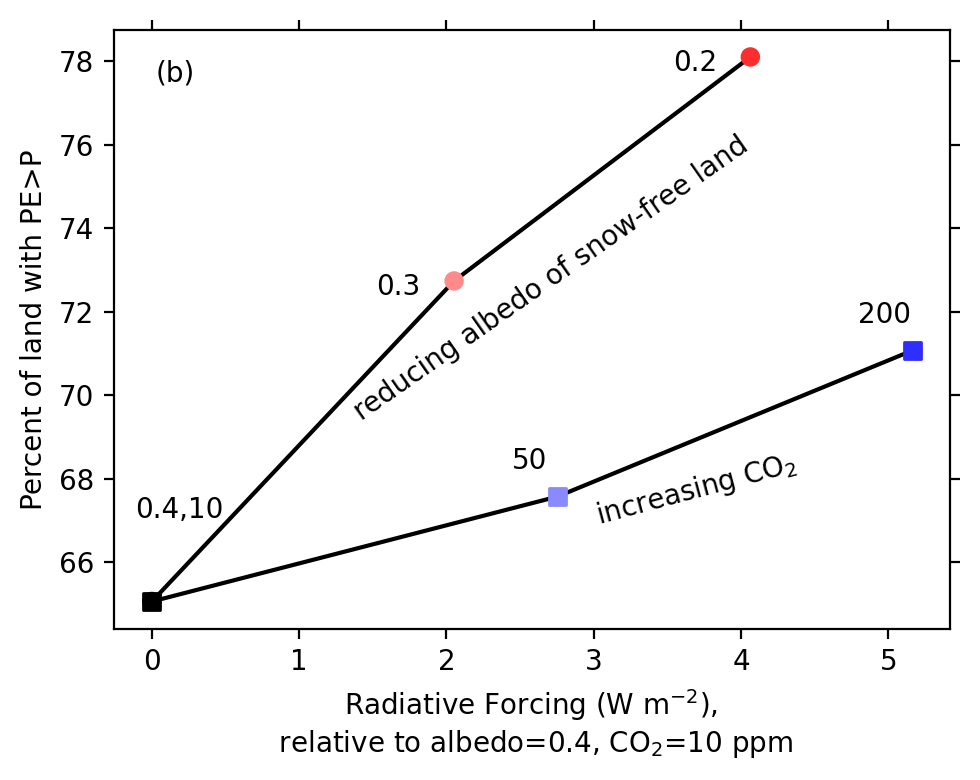

In [25]:
# Figure 4b Radiative Forcing vs. Percent of Land with PE > P

if toggle_color ==1:
    filepath = 'JGRfigures/Fig4b_color'
else:
    filepath = 'JGRfigures/Fig4b'

# co2 = np.array([10, 50, 200])
# co2_rf = np.array([0, 2.75, 5.16])

# edit data: Percent of Land with PE > P
# co2_pctT = xr.DataArray([50.8, 54.16 ,59.83])

# # alb = np.array([0.4, 0.3, 0.2])
# # alb_rf = np.array([0, 2.05, 4.06])

# # edit data: Percent of Land with PE > P
# alb_pctT = np.array([50.8, 56.77, 67.87])

# runs used in this plot
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']

# retrieve data from pandas data frame and put into array
co2_pctPEmP = np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_pctPEmP[r] = data_table.loc[[co2_runs[r]],['Percent of land area with PE>P in annual mean']].values

# retrieve data from pandas data frame and put into array
alb_pctPEmP = np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_pctPEmP[r] = data_table.loc[[alb_runs[r]],['Percent of land area with PE>P in annual mean']].values



da_co2 = xr.DataArray(
    co2_pctPEmP,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(
    alb_pctPEmP,
    coords=[alb_rf],
    dims="rad_forcing",
)

fig, ax = plt.subplots(dpi = 200,figsize = (5,4))
da_co2.plot(marker = None if toggle_color == 1 else 's', #'s',
            c = 'k', markerfacecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k')
da_alb.plot(marker = None if toggle_color == 1 else 'o', #'o',
            c = 'k', markerfacecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k')
if toggle_color == 1:
    da_co2.plot.scatter(marker = 's', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,)
    da_alb.plot.scatter(marker = 'o', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,)
else:
    pass

# Add subplot annotation inside the axes
# ax.text(0.05, 0.95, '(c)', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.95, '(b)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
plt.annotate(f"{alb[0]},{co2[0]}", (co2_rf[0], co2_pctPEmP[0]), textcoords="offset points", xytext=(10,30), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_pctPEmP)):
    plt.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(-10,10), ha='center') if i != 0 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_pctPEmP)):
    plt.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(-20,-5), ha='center') if i != 0 else None

# Annotate "increasing CO2"
plt.annotate("increasing CO$_2$", (co2_rf[1], co2_pctPEmP[1]), textcoords="offset points", xytext=(50,-10), ha='center', rotation=15)

# Annotate "decreasing albedo"
plt.annotate("reducing albedo of snow-free land", (alb_rf[1], alb_pctPEmP[1]), textcoords="offset points", xytext=(35,-50), ha='center', rotation=35)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

# plt.ylim([24,40])
# plt.yticks(np.arange(-.2,1,0.2),minor=True)
plt.xticks(np.arange(0,6,1), minor=True)

plt.ylabel('Percent of land with PE>P')
plt.xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.4, CO$_2$=10 ppm')

plt.tight_layout()
fig.savefig(filepath+'.png', dpi=300,facecolor=None,edgecolor=None,bbox_inches='tight',transparent=True,pad_inches=0.01)

plt.show();plt.close()

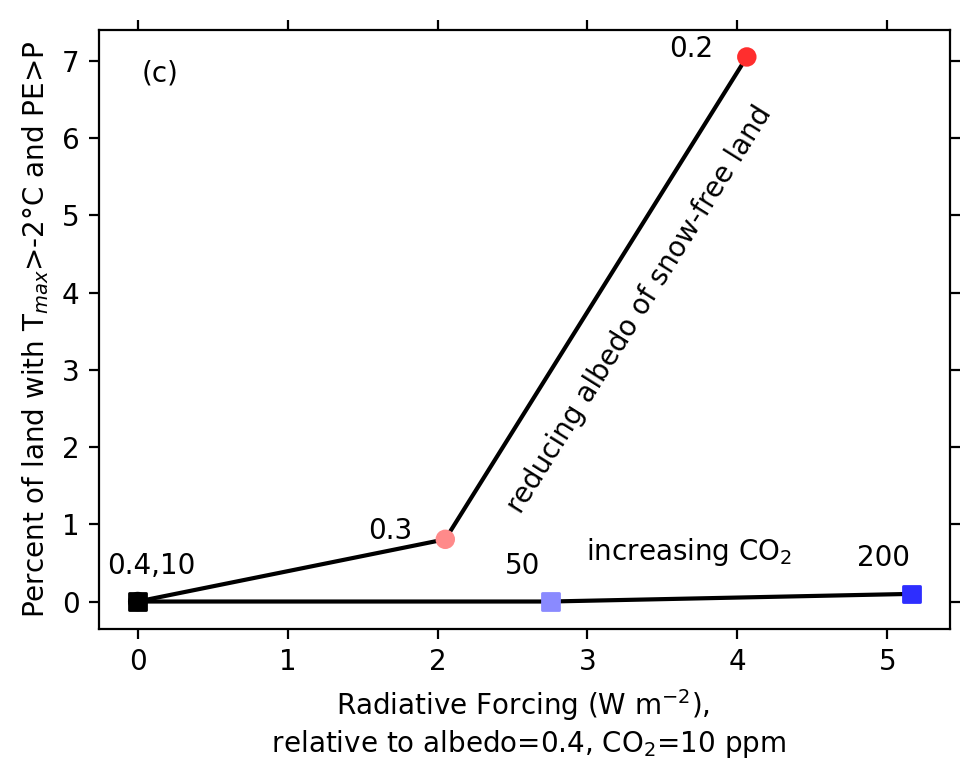

In [14]:
# Figure 4c Radiative Forcing vs. Percent of Land with Tmax > -2°C and PE > P

if toggle_color == 1:
    filepath = 'JGRfigures/Fig4c_color'
else:
    filepath = 'JGRfigures/Fig4c'


# co2 = np.array([10, 50, 200])
# co2_rf = np.array([0, 2.75, 5.16])

# # edit data: Percent of Land with Tmax > -2°C and PE > P
# co2_pctT = xr.DataArray([0.1, 0.23, 0.54])

# # alb = np.array([0.4, 0.3, 0.2])
# # alb_rf = np.array([0, 2.05, 4.06])

# # edit data: Percent of Land with Tmax > -2°C and PE > P
# alb_pctT = np.array([0.1, 3.1, 12.02])

# runs used in this plot
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']]

# retrieve data from pandas data frame and put into array
co2_pctB = np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_pctB[r] = data_table.loc[[co2_runs[r]],['Percent of land area with PE>P and Tmax>-2C']].values

# retrieve data from pandas data frame and put into array
alb_pctB = np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_pctB[r] = data_table.loc[[alb_runs[r]],['Percent of land area with PE>P and Tmax>-2C']].values



da_co2 = xr.DataArray(
    co2_pctB,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(
    alb_pctB,
    coords=[alb_rf],
    dims="rad_forcing",
)

fig, ax = plt.subplots(dpi = 200,figsize = (5,4))
da_co2.plot(marker = None if toggle_color == 1 else 's', #'s',
            c = 'k', markerfacecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k')
da_alb.plot(marker = None if toggle_color == 1 else 'o', #'o',
            c = 'k', markerfacecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k')
if toggle_color == 1:
    da_co2.plot.scatter(marker = 's', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,)
    da_alb.plot.scatter(marker = 'o', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,)
else:
    pass

# Add subplot annotation inside the axes
# ax.text(0.05, 0.95, '(d)', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.95, '(c)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
plt.annotate(f"{alb[0]},{co2[0]}", (co2_rf[0], co2_pctB[0]), textcoords="offset points", xytext=(5,10), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_pctB)):
    plt.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(-10,10), ha='center') if i != 0 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_pctB)):
    plt.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(-20,0), ha='center') if i != 0 else None

# Annotate "increasing CO2"
plt.annotate("increasing CO$_2$", (co2_rf[1], co2_pctB[1]), textcoords="offset points", xytext=(50,15), ha='center', rotation=0)

# Annotate "decreasing albedo"
plt.annotate("reducing albedo of snow-free land", (alb_rf[1], alb_pctB[1]), textcoords="offset points", xytext=(70,10), ha='center', rotation=58)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

# plt.ylim([-2,14])
# plt.yticks(np.arange(-.2,1,0.2),minor=True)
plt.xticks(np.arange(0,6,1), minor=True)

plt.ylabel('Percent of land with T$_{max}$>-2°C and PE>P')
plt.xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.4, CO$_2$=10 ppm')

plt.tight_layout()
fig.savefig(filepath+'.png', dpi=300,facecolor=None,edgecolor=None,bbox_inches='tight',transparent=True,pad_inches=0.01)

plt.show();plt.close()


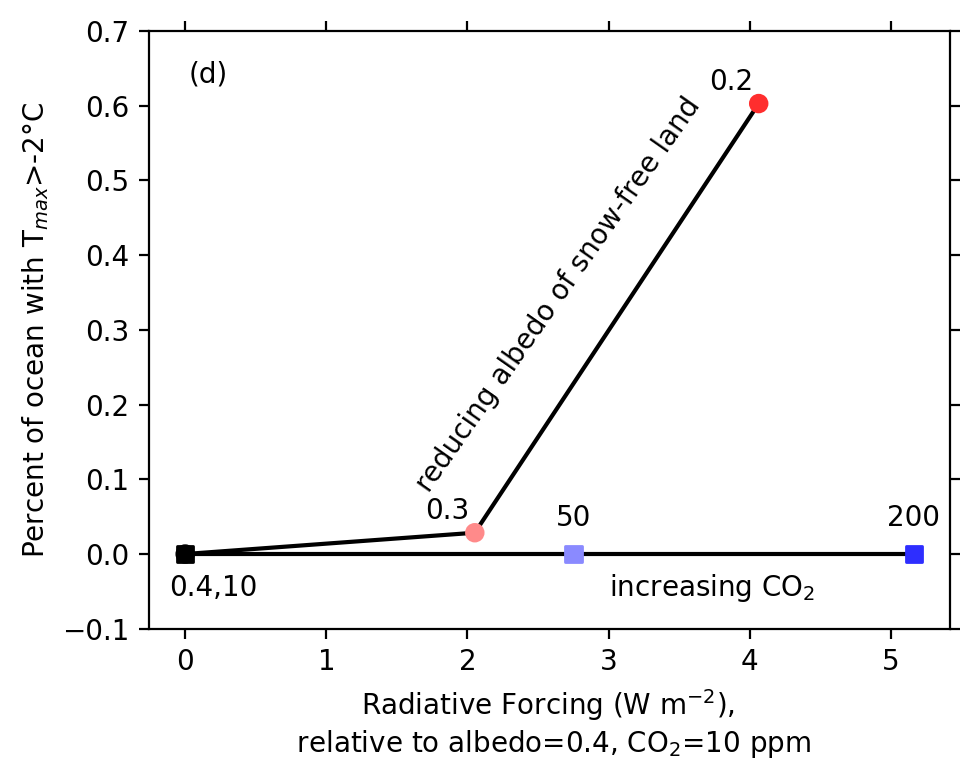

In [15]:
# Figure 4d Radiative Forcing vs. Percent of Ocean with Tmax > -2°C 

if toggle_color == 1:
    filepath = 'JGRfigures/Fig4d_color'
else:
    filepath = 'JGRfigures/Fig4d'


# co2 = np.array([10, 50, 200])
# co2_rf = np.array([0, 2.75, 5.16])

# # edit data: Percent of Land with Tmax > -2°C and PE > P
# co2_pctT = xr.DataArray([0, 0.01, 0.04])

# alb = np.array([0.4, 0.3, 0.2])
# alb_rf = np.array([0, 2.05, 4.06])

# # edit data: Percent of Land with Tmax > -2°C and PE > P
# alb_pctT = np.array([0, 0.24, 1.17])

# runs used in this plot
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']
# ['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']

# retrieve data from pandas data frame and put into array
co2_pctT = np.empty([len(co2_runs)])
for r in range(len(co2_runs)):
    co2_pctT[r] = data_table.loc[[co2_runs[r]],['Percent of ocean area with PE>P and Tmax>-2C']].values

# retrieve data from pandas data frame and put into array
alb_pctT = np.empty([len(alb_runs)])
for r in range(len(co2_runs)):
    alb_pctT[r] = data_table.loc[[alb_runs[r]],['Percent of ocean area with PE>P and Tmax>-2C']].values



da_co2 = xr.DataArray(
    co2_pctT,
    coords=[co2_rf],
    dims="rad_forcing",
)

da_alb = xr.DataArray(
    alb_pctT,
    coords=[alb_rf],
    dims="rad_forcing",
)

fig, ax = plt.subplots(dpi = 200,figsize = (5,4))
da_co2.plot(marker = None if toggle_color == 1 else 's', #'s',
            c = 'k', markerfacecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k')
da_alb.plot(marker = None if toggle_color == 1 else 'o', #'o',
            c = 'k', markerfacecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k')
if toggle_color == 1:
    da_co2.plot.scatter(marker = 's', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_050p30p50a'], run_color['moderncam4b_200p30p50a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,)
    da_alb.plot.scatter(marker = 'o', 
                        color = [run_color['moderncam4b_010p30p50a'], run_color['moderncam4b_010p20p40a'], run_color['moderncam4b_010p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,)
else:
    pass

# Add subplot annotation inside the axes
# ax.text(0.05, 0.95, '(e)', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.95, '(d)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
plt.annotate(f"{alb[0]},{co2[0]}", (co2_rf[0], co2_pctT[0]), textcoords="offset points", xytext=(10,-15), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_pctT)):
    plt.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(0,10), ha='center') if i != 0 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_pctT)):
    plt.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(-10,5), ha='center') if i != 0 else None

# Annotate "increasing CO2"
plt.annotate("increasing CO$_2$", (co2_rf[1], co2_pctT[1]), textcoords="offset points", xytext=(50,-15), ha='center', rotation=0)

# Annotate "decreasing albedo"
plt.annotate("reducing albedo of snow-free land", (alb_rf[1], alb_pctT[1]), textcoords="offset points", xytext=(30,15), ha='center', rotation=55)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

plt.ylim([-.1,.7])
# plt.yticks(np.arange(-.2,1,0.2),minor=True)
plt.xticks(np.arange(0,6,1), minor=True)

plt.ylabel('Percent of ocean with T$_{max}$>-2°C')
plt.xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.4, CO$_2$=10 ppm')

plt.tight_layout()
fig.savefig(filepath+'.png', dpi=300,facecolor=None,edgecolor=None,bbox_inches='tight',transparent=True,pad_inches=0.01)

plt.show();plt.close()


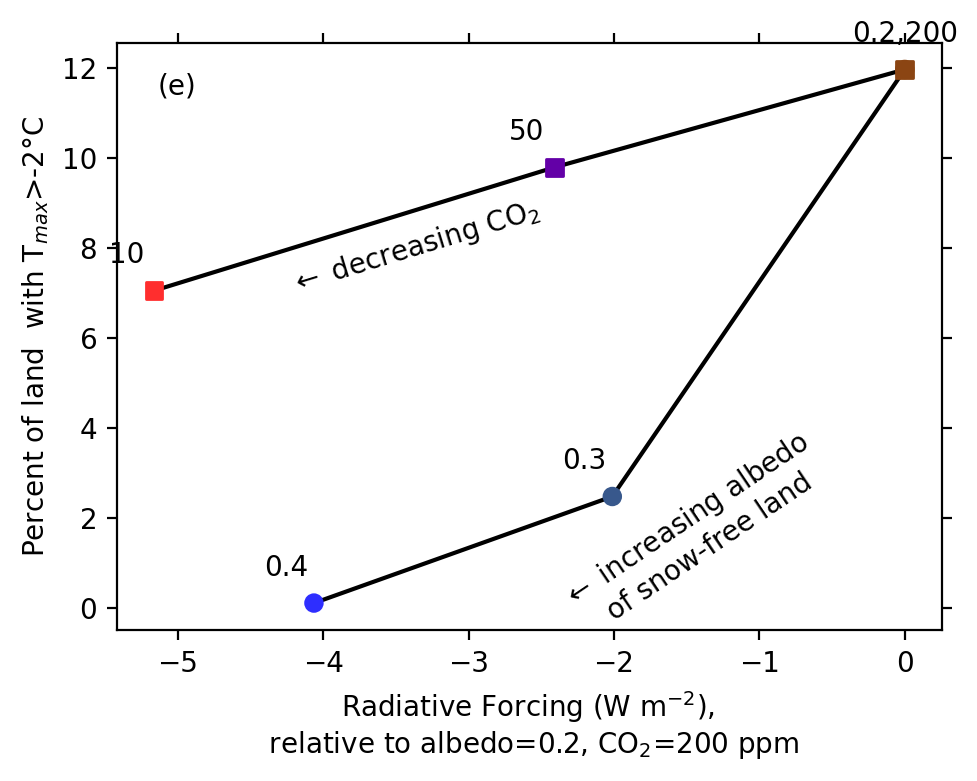

In [16]:
# Figure 4e Radiative Forcing vs. Percent of Land with Tmax>-2°C

if toggle_color == 1:
    filepath = 'JGRfigures/Fig4e_color'
else:
    filepath = 'JGRfigures/Fig4e'


# co2 = np.array([10, 50, 200])
# co2_rf = np.array([4.06, 6.81, 9.22]) - 9.22

# # edit data: Percent of Land with Tmax>-2°C, this time with baseline at 0.2, 200 ppm, and we're going negative radiative forcing
# co2_data = xr.DataArray([12.15, 14.99, 17.22])

# alb = np.array([0.4, 0.3, 0.2])
# alb_rf = np.array([5.16, 7.21, 9.22]) - 9.22

# # edit data: Percent of Land with Tmax>-2°C
# alb_data = np.array([0.54, 5.72, 17.22])

# runs used in this plot
# ['moderncam4b_010p10p30a'], run_color['moderncam4b_050p10p30a'], run_color['moderncam4b_200p10p30a']
# ['moderncam4b_200p30p50a'], run_color['moderncam4b_200p20p40a'], run_color['moderncam4b_200p10p30a']

co2_runs_d=['moderncam4b_010p10p30a','moderncam4b_050p10p30a','moderncam4b_200p10p30a']
alb_runs_d=['moderncam4b_200p30p50a','moderncam4b_200p20p40a','moderncam4b_200p10p30a']


# retrieve data from pandas data frame and put into array
co2_rf_d=np.empty([len(co2_runs_d)])
for r in range(len(co2_runs_d)):
    co2_rf[r] = data_table.loc[[co2_runs_d[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values-baseline_rf

# retrieve data from pandas data frame and put into array
alb_rf_d=np.empty([len(alb_runs_d)])
for r in range(len(co2_runs_d)):
    alb_rf[r] = data_table.loc[[alb_runs_d[r]],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values-baseline_rf


# data: Percent of Land with Tmax>-2°C, this time with baseline at 0.2, 200 ppm, and we're going negative radiative forcing
# baseline run is : moderncam4b_200p10p30a
baselinerun='moderncam4b_200p10p30a'
baseline_data = data_table.loc[[baselinerun],['Percent of land area with Tmax>-2C in warmest month']].values
baseline_rf = data_table.loc[[baselinerun],['Radiative forcing (W m-2) relative to 10ppm, albedo 0.4']].values

# retrieve data from pandas data frame and put into array
co2_data = np.empty([len(co2_runs_d)])
for r in range(len(co2_runs_d)):
    co2_data[r] = data_table.loc[[co2_runs_d[r]],['Percent of land area with Tmax>-2C in warmest month']].values #- baseline_data

# retrieve data from pandas data frame and put into array
alb_data = np.empty([len(alb_runs_d)])
for r in range(len(co2_runs_d)):
    alb_data[r] = data_table.loc[[alb_runs_d[r]],['Percent of land area with Tmax>-2C in warmest month']].values #- baseline_data


da_co2 = xr.DataArray(co2_data,
    coords=[co2_rf],#-baseline_rf,
    dims="rad_forcing",
)

da_alb = xr.DataArray(alb_data,
    coords=[alb_rf],#-baseline_rf,
    dims="rad_forcing",
)

fig, ax = plt.subplots(dpi = 200,figsize = (5,4))
da_co2.plot(marker = None if toggle_color == 1 else 's', #'s',
            c = 'k', markerfacecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_200p30p50a'] if toggle_color == 1 else 'k')
da_alb.plot(marker = None if toggle_color == 1 else 'o', #'o',
            c = 'k', markerfacecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k',
            markeredgecolor = run_color['moderncam4b_010p10p30a'] if toggle_color == 1 else 'k')
if toggle_color == 1:
    da_co2.plot.scatter(marker = 's', 
                        color = [run_color['moderncam4b_010p10p30a'], run_color['moderncam4b_050p10p30a'], run_color['moderncam4b_200p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,)
    da_alb.plot.scatter(marker = 'o', 
                        color = [run_color['moderncam4b_200p30p50a'], run_color['moderncam4b_200p20p40a'], run_color['moderncam4b_200p10p30a']] if toggle_color == 1 else 'k', 
                        zorder = 5, 
                        edgecolors = edgecolors,)
else:
    pass

# Add subplot annotation inside the axes
ax.text(0.05, 0.95, '(e)', transform=ax.transAxes, verticalalignment='top')

# Annotate the first point with both CO2 and albedo values
plt.annotate(f"{alb[2]},{co2[2]}", (co2_rf[2], co2_data[2]), textcoords="offset points", xytext=(0,10), ha='center')

# Annotate points with CO2 and albedo values
for i, (x, y) in enumerate(zip(co2_rf, co2_data)):
    plt.annotate(f"{co2[i]}", (x, y), textcoords="offset points", xytext=(-10,10), ha='center') if i != 2 else None
for i, (x, y) in enumerate(zip(alb_rf, alb_data)):
    plt.annotate(f"{alb[i]}", (x, y), textcoords="offset points", xytext=(-10,10), ha='center') if i != 2 else None

# Annotate "increasing CO2"
plt.annotate(r"$\leftarrow$ decreasing CO$_2$", (co2_rf[1], co2_data[1]), textcoords="offset points", xytext=(-50,-45), ha='center', rotation=17)

# Annotate "decreasing albedo"
plt.annotate("$\leftarrow$ increasing albedo\n of snow-free land", (alb_rf[1], alb_data[1]), textcoords="offset points", xytext=(30,-50), ha='center', rotation=34)

# Add ticks on all sides of the box
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

# plt.ylim([-.5,20])
# plt.xlim([-6,1])

# plt.yticks(np.arange(0,20,1),minor=True)
# plt.xticks(np.arange(-6,0,1), minor=True)

plt.ylabel('Percent of land  with T$_{max}$>-2°C')
plt.xlabel('Radiative Forcing (W m$^{-2}$), \n relative to albedo=0.2, CO$_2$=200 ppm')

plt.tight_layout()
fig.savefig(filepath+'.png', dpi=300,facecolor=None,edgecolor=None,bbox_inches='tight',transparent=True,pad_inches=0.01)

plt.show();plt.close()